In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
from utils import *

In [2]:
client=get_cluster()

In [4]:
yrs=[str(y) for y in range(1980,2030,10)]
dvs=['RAIN','SNOW','TSA','RH2M','SOILWATER_10CM']
dsets=[get_ds(yr+'_lens',dvs) for yr in yrs]
lens=xr.concat(dsets,dim='time')
ds=dsets[0]
la=get_foco(ds)*ds.la

In [5]:
gg=xr.open_dataset('../data/precip.mon.mean_c221208.nc')
import xesmf as xe
regridder = xe.Regridder(gg, ds, "bilinear")
pgpcp=gmean(regridder(gg.precip),la).sel(time=slice('1981','2020'))

In [6]:
p=24*60*60*gmean(lens.PREC.sel(time=slice('1981','2020')),la).stack({'et':['ens','time']})

In [15]:
cce=get_ds('2020_era5_i04',dvs)

In [20]:
pcce=24*60*60*gmean(cce.PREC,la).stack({'et':['ens','time']})

<xarray.DataArray (month: 9, quantile: 2)>
array([[0.62644663, 0.82529437],
       [0.51011066, 0.64139567],
       [0.65296824, 0.75499006],
       [0.79708467, 0.98216986],
       [0.72475766, 0.97305981],
       [0.37454641, 0.49458487],
       [0.34604872, 0.37093679],
       [0.5172266 , 0.55309394],
       [0.40076965, 0.4123075 ]])
Coordinates:
  * quantile  (quantile) float64 0.05 0.95
  * month     (month) int64 4 5 6 7 8 9 10 11 12

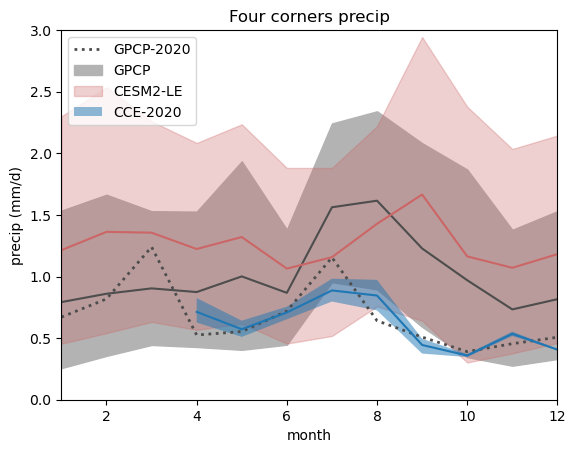

In [27]:
t=1+np.arange(12)
qqs=[0.05,0.95]

#GPCP
plt.plot(t,pgpcp.sel(time=slice('2020-01','2020-12')),':',color=[0.3,0.3,0.3],lw=2,label='GPCP-2020')
x1,x2=pgpcp.groupby('time.month').quantile(q=qqs).T
plt.fill_between(t,x1,x2,color=[0.7,0.7,0.7],label='GPCP')

#LENS2
x1,x2=p.groupby('time.month').quantile(q=qqs).T
plt.fill_between(t,x1,x2,color=[0.8,0.4,0.4],alpha=0.3,label='CESM2-LE')

#CCE
x1,x2=pcce.groupby('time.month').quantile(q=qqs).T
plt.fill_between(t[3:],x1,x2,alpha=0.5,label='CCE-2020')

plt.legend(loc=2)
plt.plot(t,pgpcp.groupby('time.month').mean(),color=[0.3,0.3,0.3])
plt.plot(t,p.groupby('time.month').mean(),color=[0.8,0.4,0.4])
plt.plot(t[3:],pcce.groupby('time.month').mean(),color="C0")

plt.xlim([1,12])
plt.ylim([0,3])
plt.ylabel('precip (mm/d)')
plt.xlabel('month')
plt.title('Four corners precip');
plt.savefig('../figs/main/precip.pdf',bbox_inches='tight',dpi=300)